In [1]:
library(tidyverse)
library(gridExtra)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




### Loading Data

In [2]:
jan <- read_csv("/kaggle/input/sales-product-data/Sales_January_2019.csv", show_col_types = FALSE)
feb <- read_csv("/kaggle/input/sales-product-data/Sales_February_2019.csv", show_col_types = FALSE)
mar <- read_csv("/kaggle/input/sales-product-data/Sales_March_2019.csv", show_col_types = FALSE)
apr <- read_csv("/kaggle/input/sales-product-data/Sales_April_2019.csv", show_col_types = FALSE)
may <- read_csv("/kaggle/input/sales-product-data/Sales_May_2019.csv", show_col_types = FALSE)
jun <- read_csv("/kaggle/input/sales-product-data/Sales_June_2019.csv", show_col_types = FALSE)
jul <- read_csv("/kaggle/input/sales-product-data/Sales_July_2019.csv", show_col_types = FALSE)
aug <- read_csv("/kaggle/input/sales-product-data/Sales_August_2019.csv", show_col_types = FALSE)
sep <- read_csv("/kaggle/input/sales-product-data/Sales_September_2019.csv", show_col_types = FALSE)
oct <- read_csv("/kaggle/input/sales-product-data/Sales_October_2019.csv", show_col_types = FALSE)
nov <- read_csv("/kaggle/input/sales-product-data/Sales_November_2019.csv", show_col_types = FALSE)
dec <- read_csv("/kaggle/input/sales-product-data/Sales_December_2019.csv", show_col_types = FALSE)

head(jan)

Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
141239,AAA Batteries (4-pack),1,2.99,01/29/19 20:22,"775 Willow St, San Francisco, CA 94016"


In [3]:
data <- bind_rows(jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec)
head(data)

Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
141239,AAA Batteries (4-pack),1,2.99,01/29/19 20:22,"775 Willow St, San Francisco, CA 94016"


In [4]:
str(data)

spc_tbl_ [186,850 × 6] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Order ID        : chr [1:186850] "141234" "141235" "141236" "141237" ...
 $ Product         : chr [1:186850] "iPhone" "Lightning Charging Cable" "Wired Headphones" "27in FHD Monitor" ...
 $ Quantity Ordered: chr [1:186850] "1" "1" "2" "1" ...
 $ Price Each      : chr [1:186850] "700" "14.95" "11.99" "149.99" ...
 $ Order Date      : chr [1:186850] "01/22/19 21:25" "01/28/19 14:15" "01/17/19 13:33" "01/05/19 20:33" ...
 $ Purchase Address: chr [1:186850] "944 Walnut St, Boston, MA 02215" "185 Maple St, Portland, OR 97035" "538 Adams St, San Francisco, CA 94016" "738 10th St, Los Angeles, CA 90001" ...
 - attr(*, "spec")=
  .. cols(
  ..   `Order ID` = col_character(),
  ..   Product = col_character(),
  ..   `Quantity Ordered` = col_character(),
  ..   `Price Each` = col_character(),
  ..   `Order Date` = col_character(),
  ..   `Purchase Address` = col_character()
  .. )
 - attr(*, "problems")=<externalptr> 


### Cleaning Data

In [5]:
data %>%
summarise_all(~sum(is.na(.)))

Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
<int>,<int>,<int>,<int>,<int>,<int>
545,545,545,545,545,545


In [6]:
data <- data %>% 
drop_na()

data %>%
summarise_all(~sum(is.na(.)))

Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0


In [7]:
data <- data %>%
rename(OrderID = "Order ID", 
       QuantityOrdered = "Quantity Ordered",
       PriceEach = "Price Each", 
       OrderDate = "Order Date",
       PurchaseAddress = "Purchase Address")

In [8]:
unique(data$QuantityOrdered)

[1] "1"                "2"                "3"                "5"               
 [5] "4"                "7"                "Quantity Ordered" "6"               
 [9] "9"                "8"

In [9]:
data <- data %>%
filter(data$QuantityOrdered != "Quantity Ordered")

unique(data$QuantityOrdered)

[1] "1" "2" "3" "5" "4" "7" "6" "9" "8"

In [10]:
data$QuantityOrdered<- as.numeric(data$QuantityOrdered)
data$PriceEach<- as.numeric(data$PriceEach)
data$OrderDate<- as.POSIXct(data$OrderDate, format = "%m/%d/%y %H:%M" )

head(data)

OrderID,Product,QuantityOrdered,PriceEach,OrderDate,PurchaseAddress
<chr>,<chr>,<dbl>,<dbl>,<dttm>,<chr>
141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
141239,AAA Batteries (4-pack),1,2.99,2019-01-29 20:22:00,"775 Willow St, San Francisco, CA 94016"


In [11]:
data <- data %>%
  separate(PurchaseAddress,
           into = c("StreetName", "City", "state_code"),
           sep = ",",
           convert = FALSE)

In [12]:
data <- data %>%
mutate(Year = format(data$OrderDate, format = "%Y"),
       Month = format(data$OrderDate, format = "%B"),
       Date = format(data$OrderDate, format = "%d"),
       Day = format(data$OrderDate, format = "%A"),
       Hour = format(data$OrderDate, format = "%H"))

data$Month = factor(data$Month, 
                    levels = month.name)
data$Day = factor(data$Day,
                        levels = c("Sunday", 
                                   "Monday", 
                                   "Tuesday", 
                                   "Wednesday", 
                                   "Thursday", 
                                   "Friday", 
                                   "Saturday"))

In [13]:
data <- data %>%
mutate(Sales = QuantityOrdered * PriceEach)

head(data)

OrderID,Product,QuantityOrdered,PriceEach,OrderDate,StreetName,City,state_code,Year,Month,Date,Day,Hour,Sales
<chr>,<chr>,<dbl>,<dbl>,<dttm>,<chr>,<chr>,<chr>,<chr>,<fct>,<chr>,<fct>,<chr>,<dbl>
141234,iPhone,1,700.00,2019-01-22 21:25:00,944 Walnut St,Boston,MA 02215,2019,January,22,Tuesday,21,700.00
141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,185 Maple St,Portland,OR 97035,2019,January,28,Monday,14,14.95
141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,538 Adams St,San Francisco,CA 94016,2019,January,17,Thursday,13,23.98
141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,738 10th St,Los Angeles,CA 90001,2019,January,05,Saturday,20,149.99
141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,387 10th St,Austin,TX 73301,2019,January,25,Friday,11,11.99
141239,AAA Batteries (4-pack),1,2.99,2019-01-29 20:22:00,775 Willow St,San Francisco,CA 94016,2019,January,29,Tuesday,20,2.99


### Analysis of Data

In [14]:
options(repr.plot.width = 17, repr.plot.height = 8)

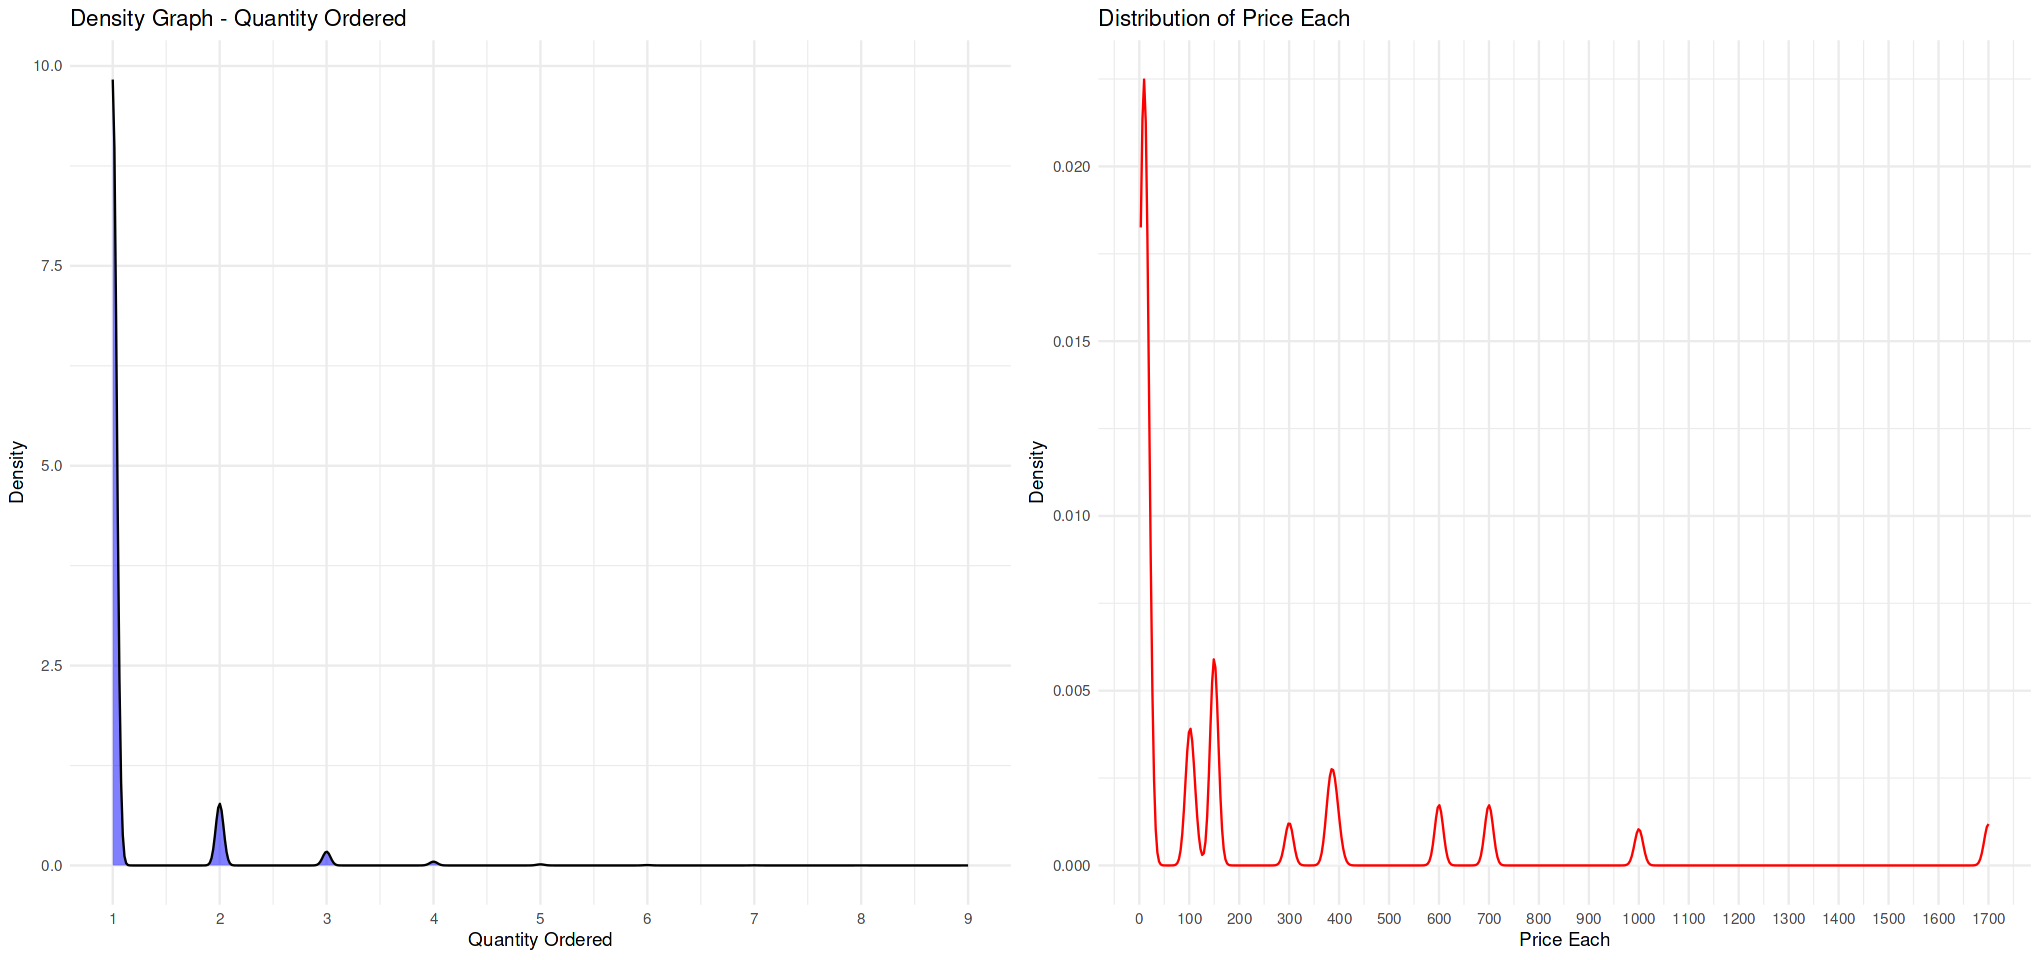

In [15]:
quantity <- ggplot(data, aes(x = QuantityOrdered)) +
  geom_density(fill = "blue", alpha = 0.5) +
  labs(title = "Density Graph - Quantity Ordered",
       x = "Quantity Ordered",
       y = "Density") +
  theme_minimal() +
  scale_x_continuous(breaks = seq(0, max(data$QuantityOrdered), by = 1))

price <- ggplot(data, aes(x = PriceEach)) +
  geom_density(color = "red", fill = "transparent",alpha = 0.5) +
  labs(title = "Distribution of Price Each",
       x = "Price Each",
       y = "Density") +
  theme_minimal() +
  scale_x_continuous(breaks = seq(0, max(data$PriceEach), by = 100))

grid.arrange(quantity, price, nrow = 1)

In [16]:
atmost2Quantity <- data %>%
  filter(QuantityOrdered <= 2) %>%
  summarize(Percentage = round(n() / nrow(data) * 100, 5))



atmost400Price <- data %>%
  filter(PriceEach <= 200) %>%
  summarize(Percentage = round(n() / nrow(data) * 100, 5))


cat("Percentage of atmost 2 products: ", atmost2Quantity$Percentage, "%\n")
cat("Percentage of atmost $200: ", atmost400Price$Percentage, "%\n")

Percentage of atmost 2 products:  97.80909 %
Percentage of atmost $200:  77.51707 %


### Most people only ordered 1 or 2 products (97.81%).
### Also products under $200 had 77.52% market share

Year,TotalSales
<chr>,<dbl>
2019,34483365.68
2020,8670.29


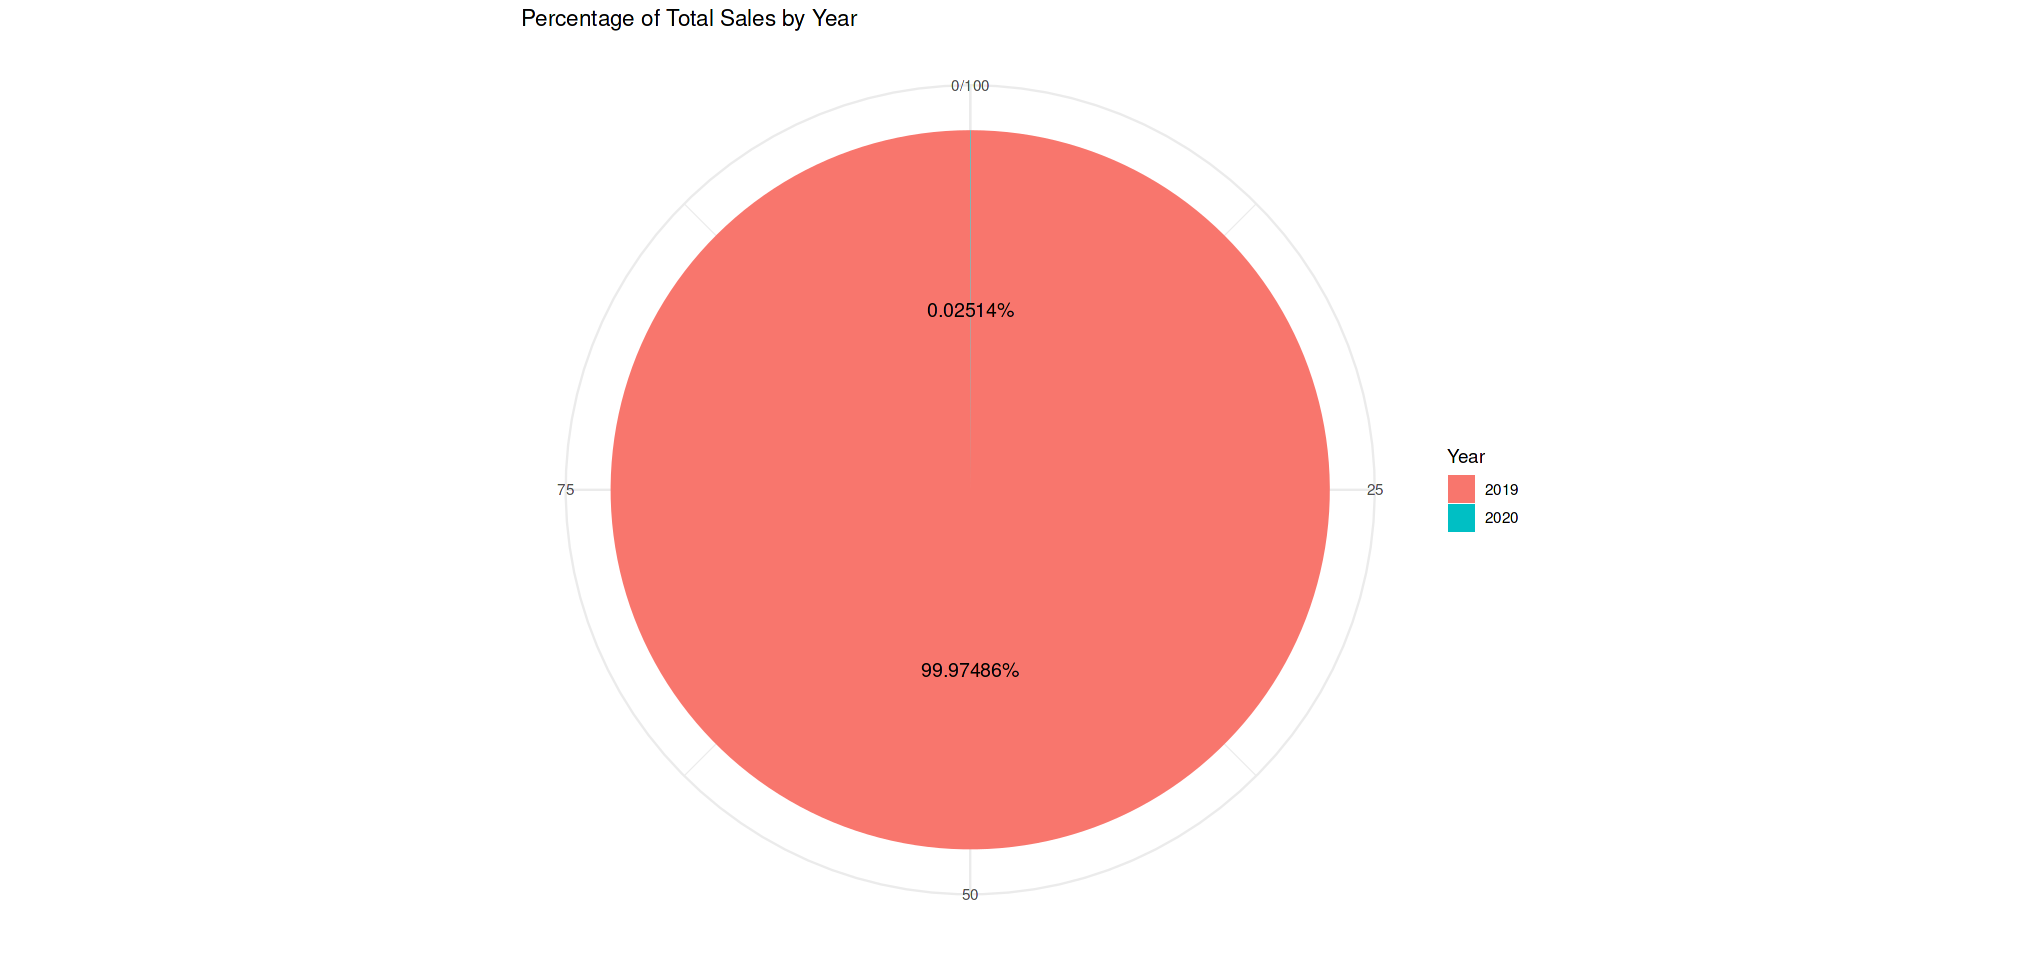

In [17]:
year <- data %>%
  group_by(Year) %>%
  summarize(TotalSales = sum(Sales))

head(year)

year$Percentage <- round(year$TotalSales / sum(year$TotalSales) * 100, 5)

piechart <- ggplot(year, aes(x = "", y = Percentage, fill = Year)) +
  geom_bar(width = 1, stat = "identity") +
  coord_polar("y", start = 0) +
  labs(title = "Percentage of Total Sales by Year",
       fill = "Year",
       x = NULL,
       y = NULL) +
  scale_fill_discrete(name = "Year") +
  theme_minimal() +
  geom_text(aes(label = paste0(Percentage, "%")),
            position = position_stack(vjust = 0.5),
            color = "black",
            size = 4)

piechart

### Most data here about year 2019

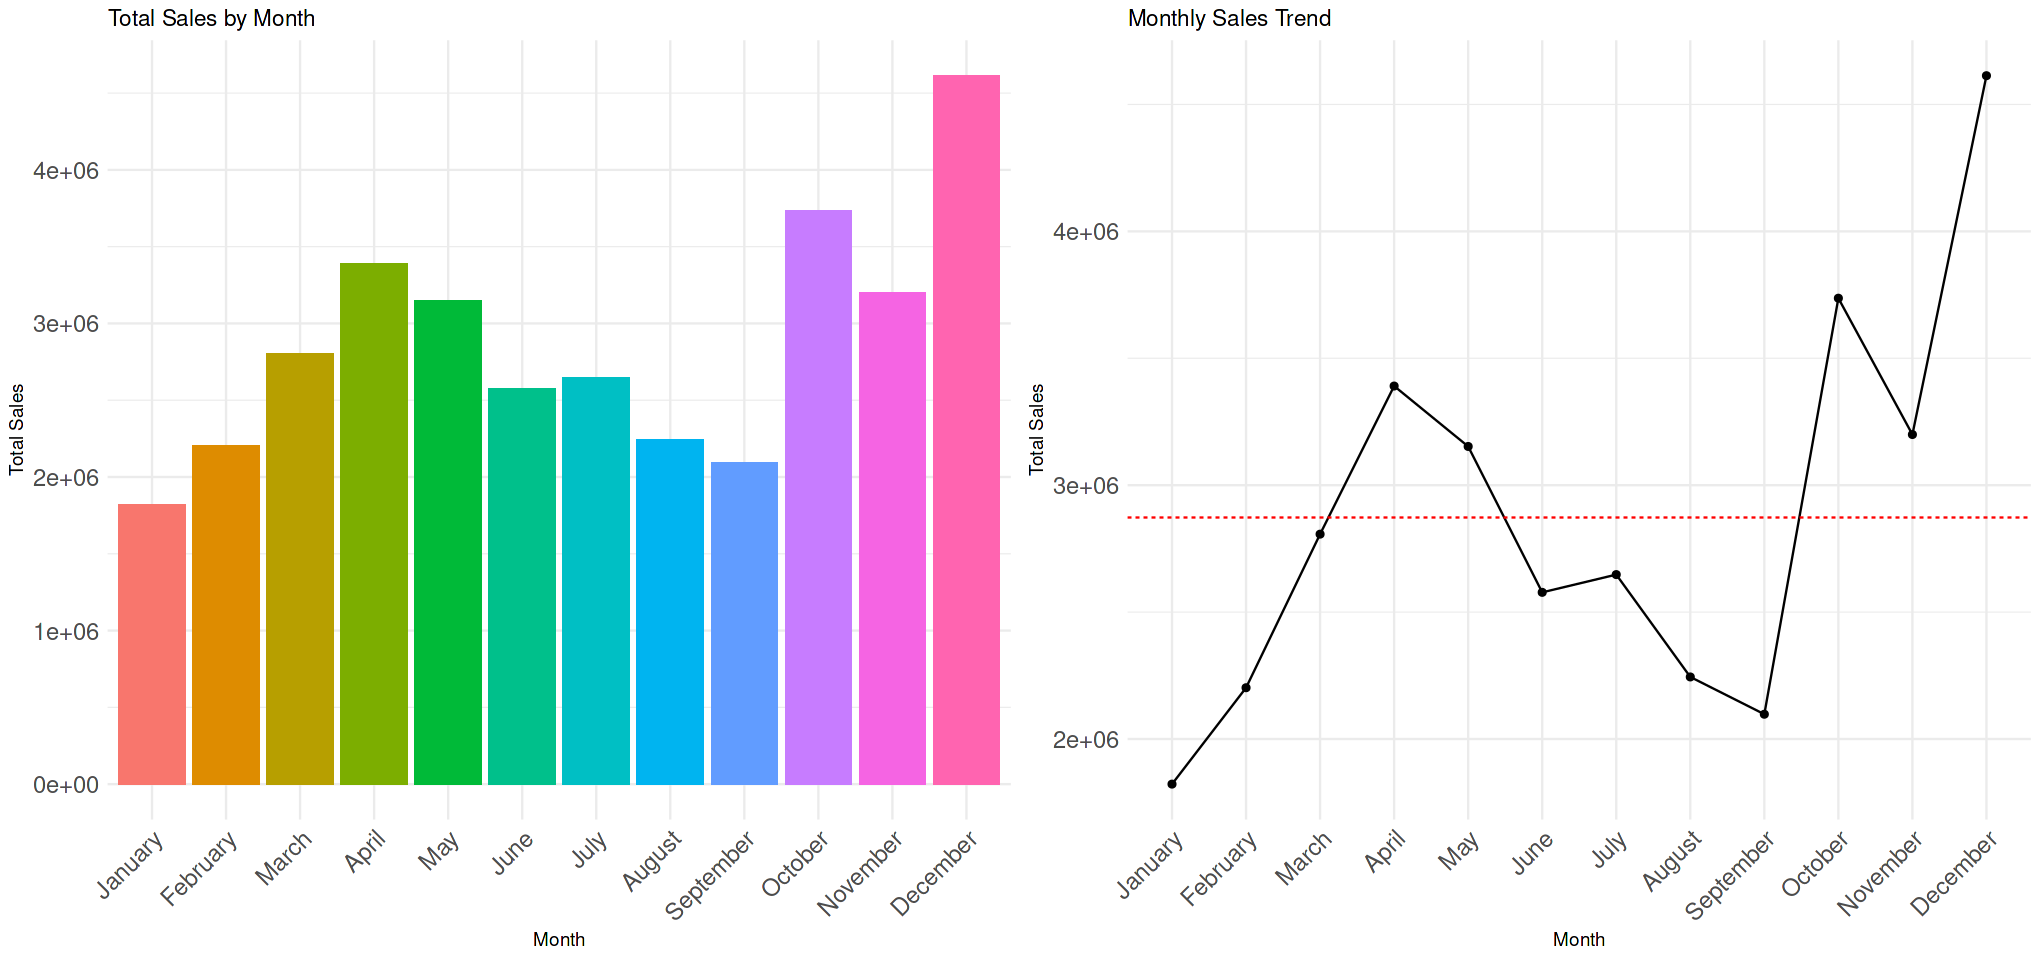

In [18]:
month <- data %>%
  group_by(Month) %>%
  summarize(TotalSales = sum(Sales))

bargraph <- ggplot(data = month) +
  geom_bar(mapping = aes(x = Month, y = TotalSales, fill = Month),
           stat = "identity",
           width = 0.90) +
  labs(title = "Total Sales by Month",
       x = "Month",
       y = "Total Sales") +
  theme_minimal() +
  theme(axis.text.x = element_text(size = 14, angle = 45, hjust = 1),
        axis.text.y = element_text(size = 14),
        legend.position = "none")

linegraph <- ggplot(data = month) +
  geom_point(mapping = aes(x = Month, y = TotalSales)) +
  geom_line(mapping = aes(x = Month, y = TotalSales, group = 1)) +
  geom_hline(yintercept = mean(month$TotalSales), linetype = "dashed", color = "red") +
  labs(title = "Monthly Sales Trend",
       x = "Month",
       y = "Total Sales") +
  theme_minimal() +
  theme(axis.text.x = element_text(size = 14, angle = 45, hjust = 1),
        axis.text.y = element_text(size = 14))

grid.arrange(bargraph, linegraph, nrow = 1)

In [19]:
month %>%
  filter(Month %in% c("December", "January"))

Month,TotalSales
<fct>,<dbl>
January,1822257
December,4613443


### Best month for sales - December with $4613443 and least sales in January

Selecting by TotalSales


Product,TotalSales,Percentage
<chr>,<dbl>,<dbl>
Macbook Pro Laptop,1093100.0,26.071321
iPhone,634200.0,15.126184
ThinkPad Laptop,538994.6,12.855458
Google Phone,429000.0,10.231998
27in 4K Gaming Monitor,336951.4,8.036563
34in Ultrawide Monitor,322611.5,7.694546


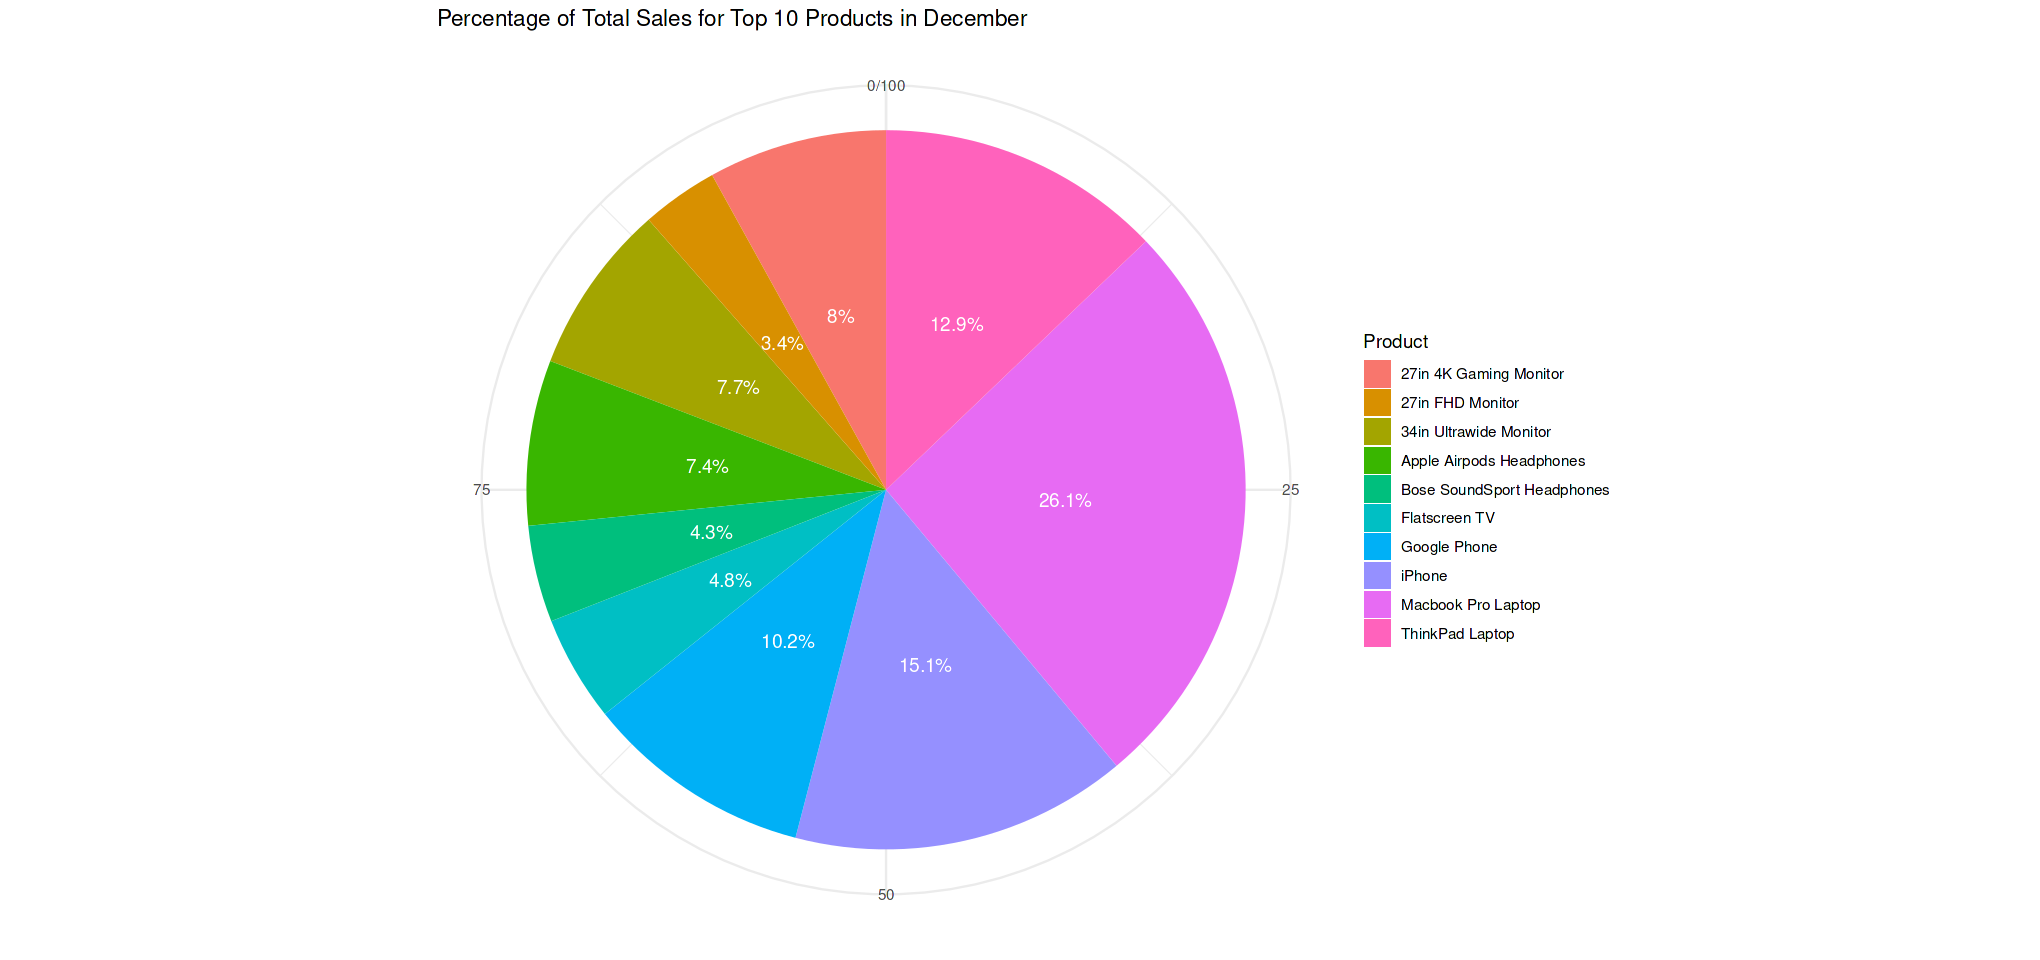

In [20]:
december <- data %>%
  filter(Month == "December")

product_sales <- december %>%
  group_by(Product) %>%
  summarize(TotalSales = sum(Sales)) %>%
  arrange(desc(TotalSales))

top_10_products <- product_sales %>%
  top_n(10)

total_sales <- sum(top_10_products$TotalSales)

top_10_products <- top_10_products %>%
  mutate(Percentage = TotalSales / total_sales * 100)

piechart <- ggplot(top_10_products, aes(x = "", y = Percentage, fill = Product)) +
  geom_bar(width = 1, stat = "identity") +
  coord_polar("y", start = 0) +
  labs(title = "Percentage of Total Sales for Top 10 Products in December",
       fill = "Product",
       x = NULL,
       y = NULL) +
  scale_fill_discrete(name = "Product") +
  geom_text(aes(label = paste0(round(Percentage, 1), "%")),
            position = position_stack(vjust = 0.5),
            color = "white") +
  theme_minimal()

piechart

head(top_10_products)

### The top-selling product in December is the Macbook Pro, which suggests high demand during the holiday season, possibly as a popular Christmas gift choice.

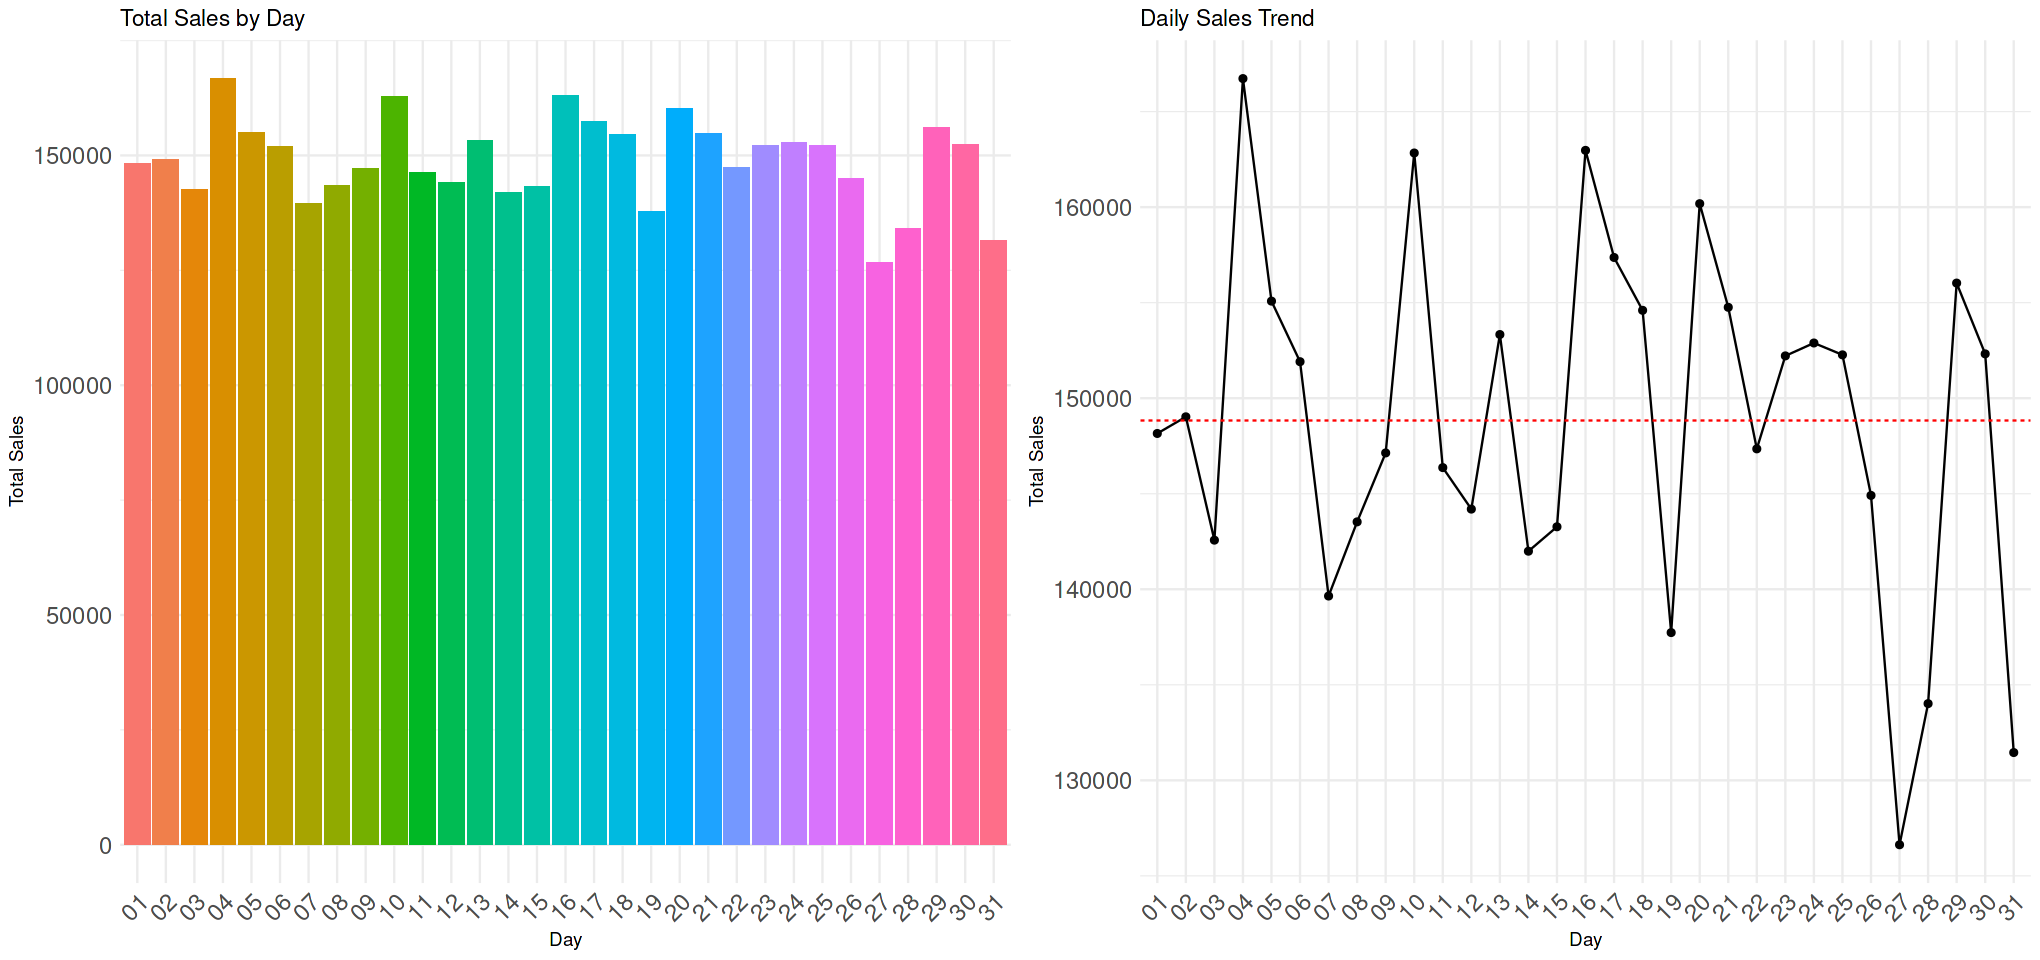

In [21]:
december <- data %>%
  filter(Month == "December") %>%
  group_by(Date) %>%
  summarize(TotalSales = sum(Sales))

bargraph <- ggplot(data = december) +
  geom_bar(mapping = aes(x = Date, y = TotalSales, fill = Date),
           stat = "identity",
           width = 0.90) +
  labs(title = "Total Sales by Day",
       x = "Day",
       y = "Total Sales") +
  theme_minimal() +
  theme(axis.text.x = element_text(size = 14, angle = 45, hjust = 1),
        axis.text.y = element_text(size = 14),
        legend.position = "none")

linegraph <- ggplot(data = december) +
  geom_point(mapping = aes(x = Date, y = TotalSales)) +
  geom_line(mapping = aes(x = Date, y = TotalSales, group = 1)) +
  geom_hline(yintercept = mean(december$TotalSales), linetype = "dashed", color = "red") +
  labs(title = "Daily Sales Trend",
       x = "Day",
       y = "Total Sales") +
  theme_minimal() +
  theme(axis.text.x = element_text(size = 14, angle = 45, hjust = 1),
        axis.text.y = element_text(size = 14))

grid.arrange(bargraph, linegraph, nrow = 1)

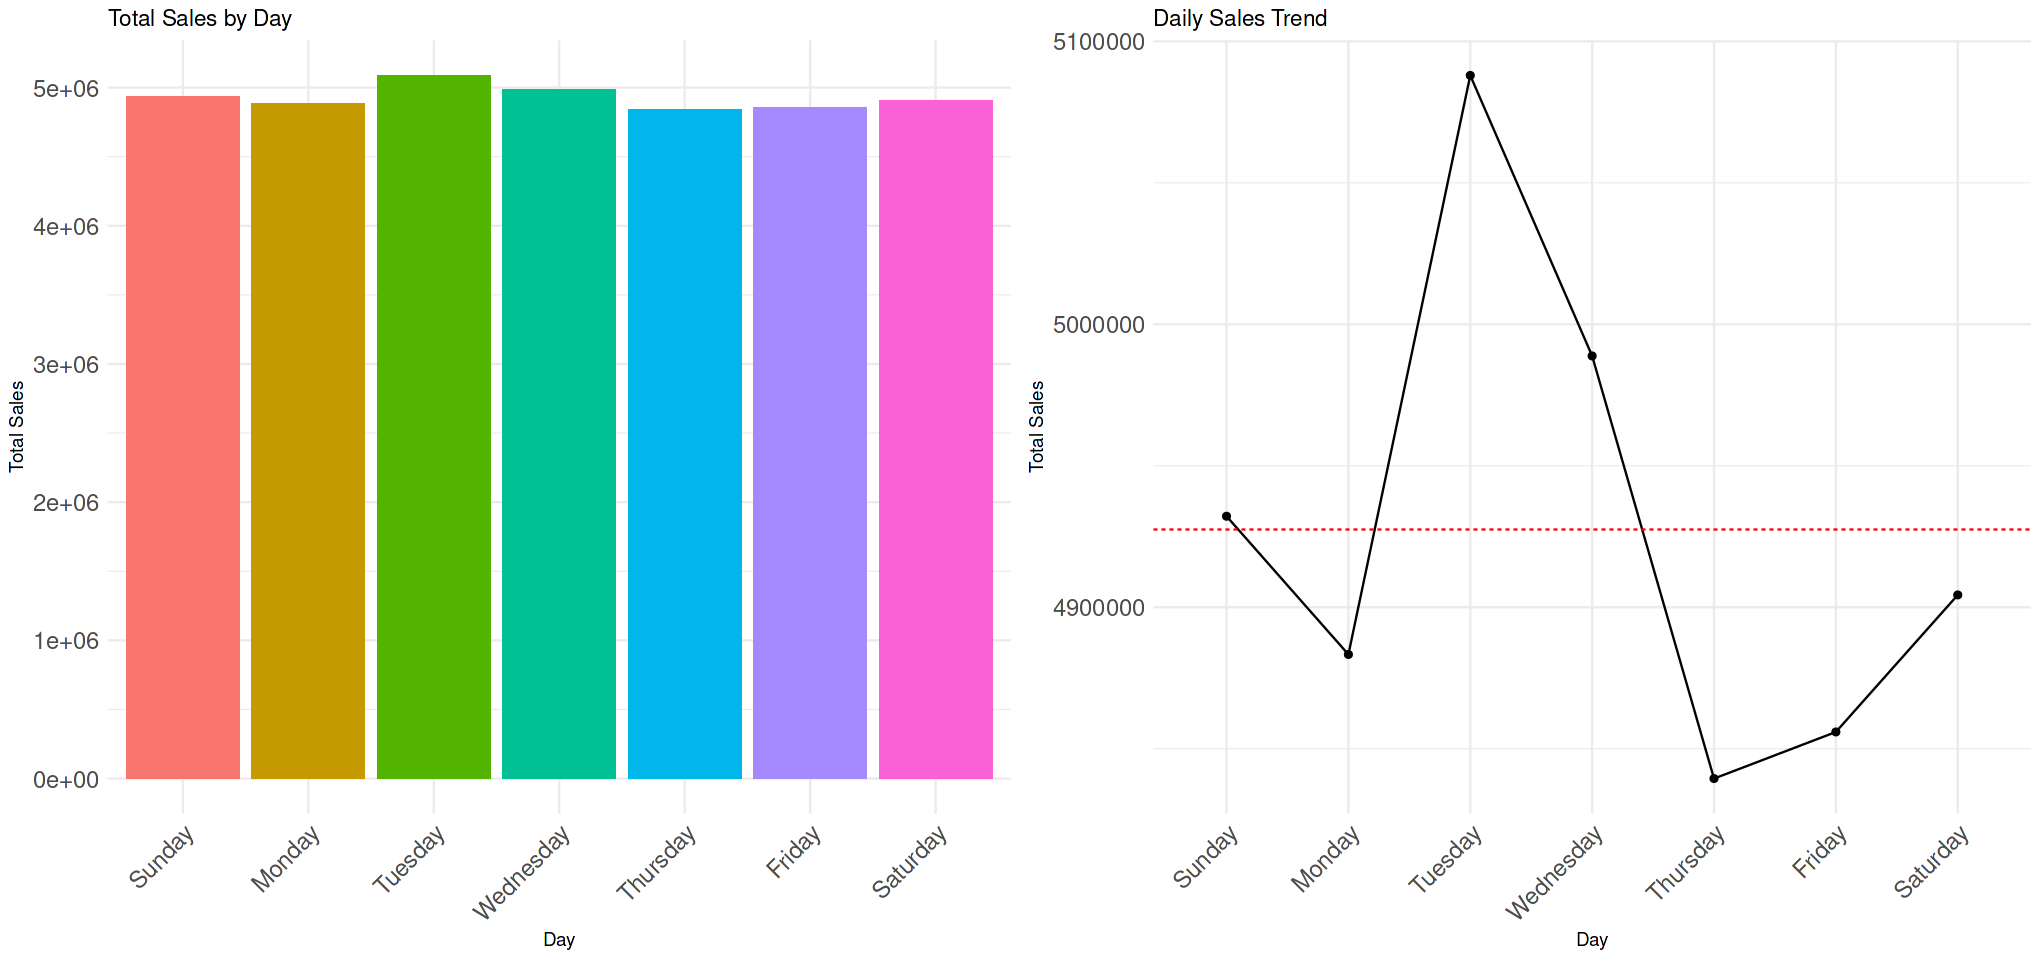

In [22]:
Day <- data %>%
group_by(Day) %>%
summarize(TotalSales = sum(Sales))

bargraph <- ggplot(data = Day) +
  geom_bar(mapping = aes(x = Day, y = TotalSales, fill = Day),
           stat = "identity",
           width = 0.90) +
  labs(title = "Total Sales by Day",
       x = "Day",
       y = "Total Sales") +
  theme_minimal() +
  theme(axis.text.x = element_text(size = 14, angle = 45, hjust = 1),
        axis.text.y = element_text(size = 14),
        legend.position = "none")

linegraph <- ggplot(data = Day) +
  geom_point(mapping = aes(x = Day, y = TotalSales)) +
  geom_line(mapping = aes(x = Day, y = TotalSales, group = 1)) +
  geom_hline(yintercept = mean(Day$TotalSales), linetype = "dashed", color = "red") +
  labs(title = "Daily Sales Trend",
       x = "Day",
       y = "Total Sales") +
  theme_minimal() +
  theme(axis.text.x = element_text(size = 14, angle = 45, hjust = 1),
        axis.text.y = element_text(size = 14))

grid.arrange(bargraph, linegraph, nrow = 1)

In [23]:
Day %>%
  filter(Day %in% c("Tuesday", "Thursday"))

Day,TotalSales
<fct>,<dbl>
Tuesday,5087957
Thursday,4839465


### Tuesday had the most sales with $5087957.

### Thursday had the least sales with $4839465.

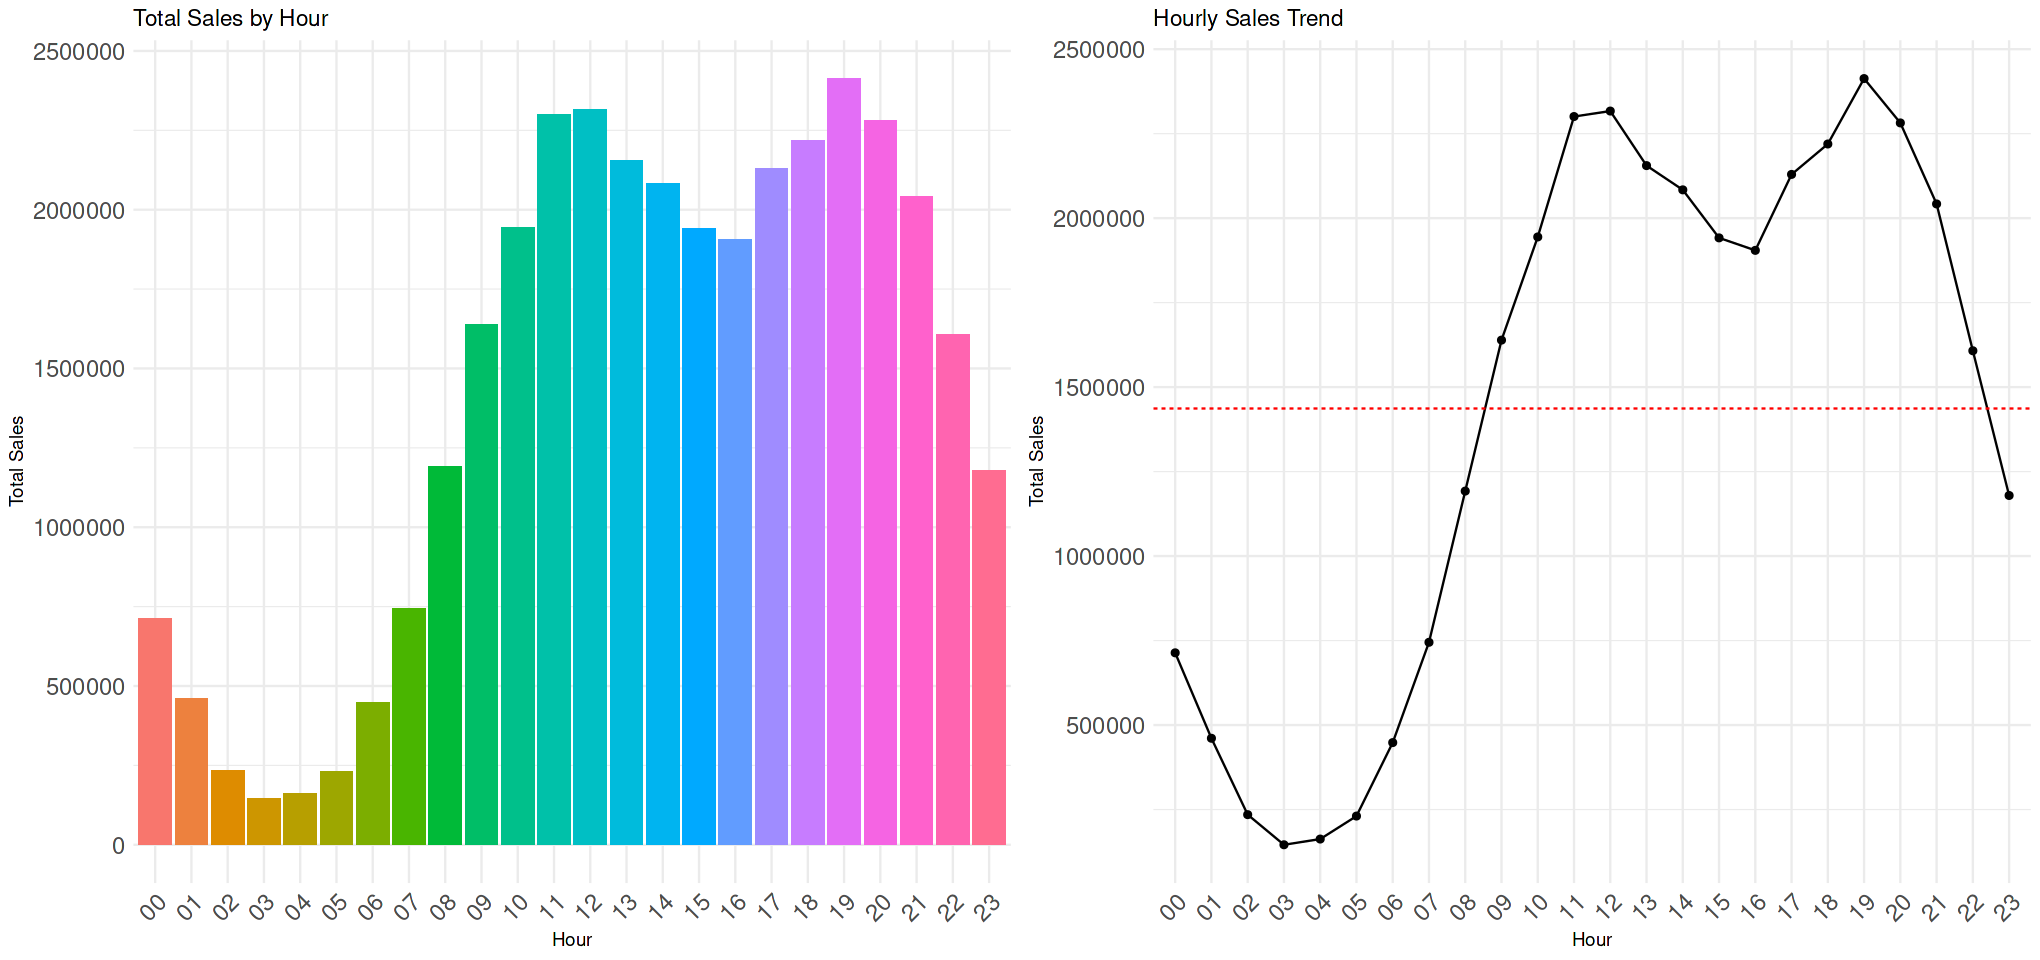

In [24]:
hour <- data %>%
group_by(Hour) %>%
summarize(TotalSales = sum(Sales))


bargraph <- ggplot(data = hour) +
  geom_bar(mapping = aes(x = Hour, y = TotalSales, fill = Hour),
           stat = "identity",
           width = 0.90) +
  labs(title = "Total Sales by Hour",
       x = "Hour",
       y = "Total Sales") +
  theme_minimal() +
  theme(axis.text.x = element_text(size = 14, angle = 45, hjust = 1),
        axis.text.y = element_text(size = 14),
        legend.position = "none")

linegraph <- ggplot(data = hour) +
  geom_point(mapping = aes(x = Hour, y = TotalSales)) +
  geom_line(mapping = aes(x = Hour, y = TotalSales, group = 1)) +
  geom_hline(yintercept = mean(hour$TotalSales), linetype = "dashed", color = "red") +
  labs(title = "Hourly Sales Trend",
       x = "Hour",
       y = "Total Sales") +
  theme_minimal() +
  theme(axis.text.x = element_text(size = 14, angle = 45, hjust = 1),
        axis.text.y = element_text(size = 14))

grid.arrange(bargraph, linegraph, nrow = 1)

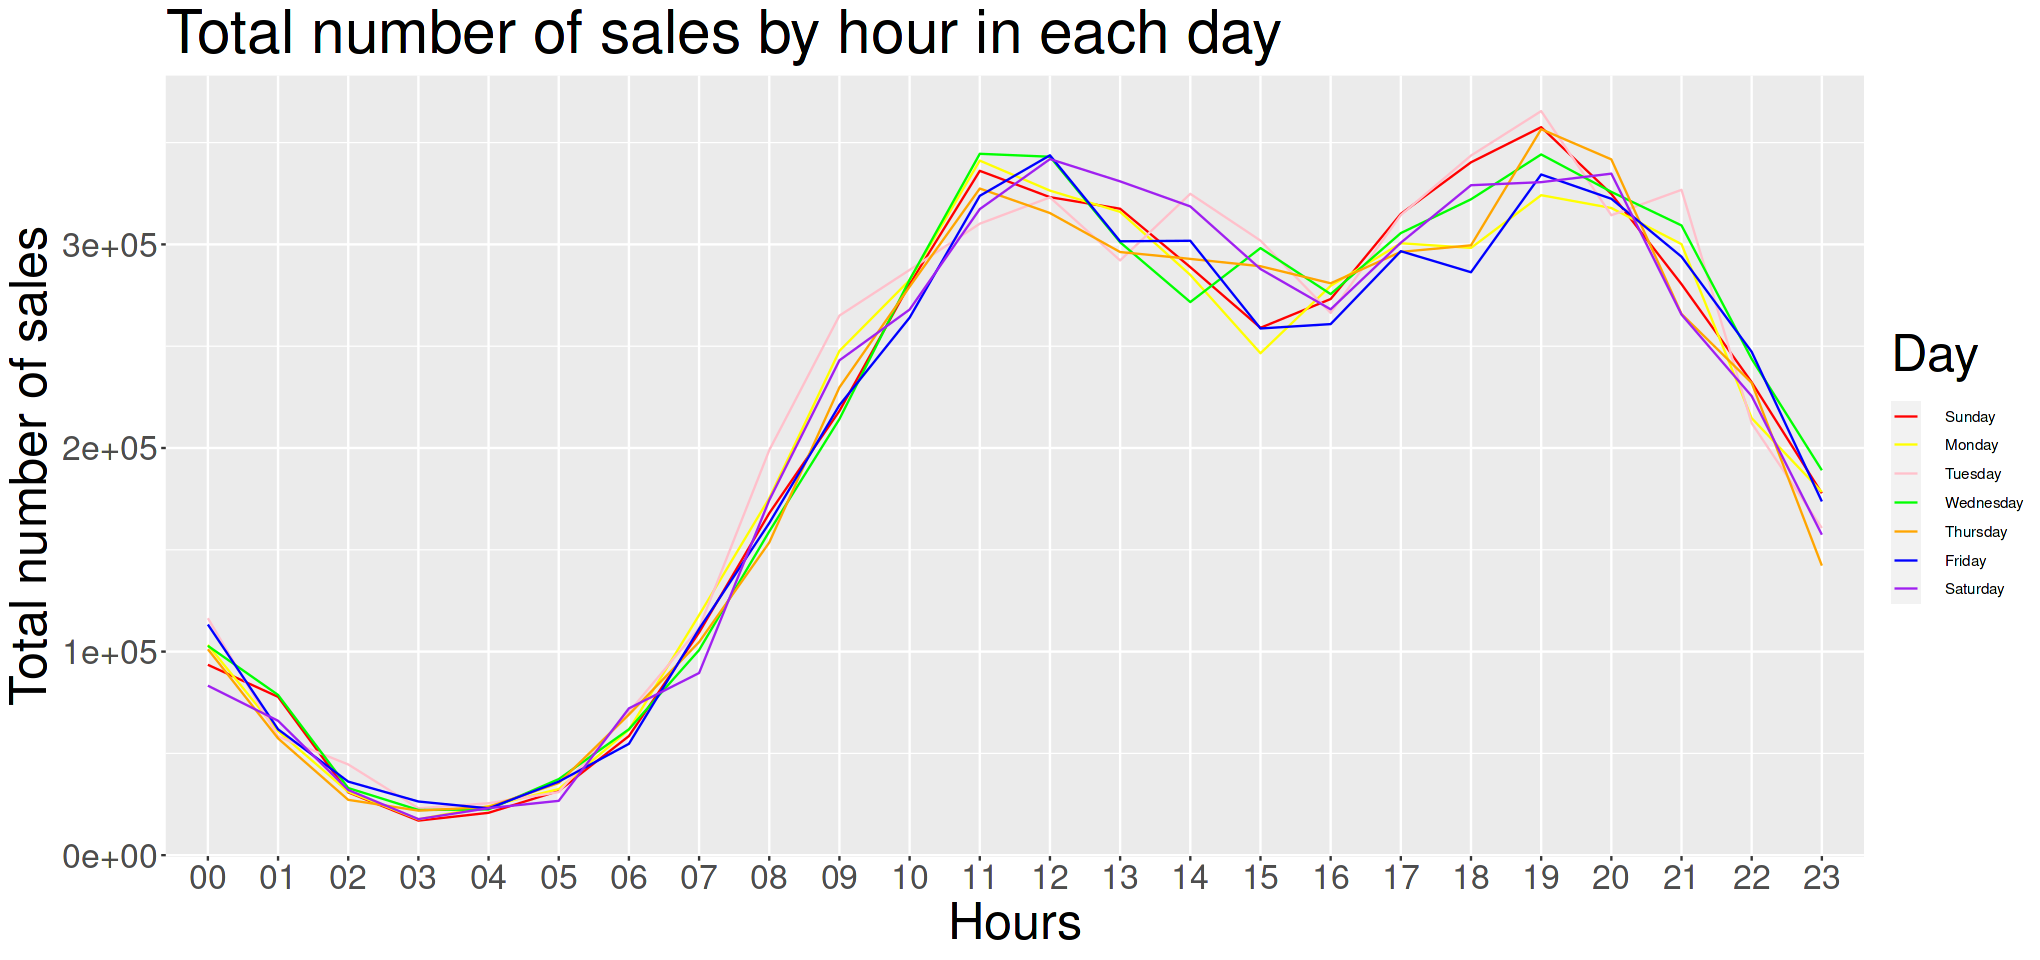

In [25]:
days = c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday")
colors = c("red", "yellow", "pink", "green", "orange", "blue", "purple")

data %>% 
select(Hour,Day, Sales) %>%
group_by(Day, Hour) %>%
summarize(Sales = sum(Sales), .groups = "keep")%>%
ggplot(aes(x=Hour, y=Sales, group=Day)) +
geom_line(aes(color=Day)) +
scale_color_manual(name='Day', 
                   labels=days, 
                   values=colors)+
labs(title = "Total number of sales by hour in each day", 
     x = "Hours", 
     y = "Total number of sales") +
theme(axis.text = element_text(size = 20)) +
theme(axis.title = element_text(size = 30), 
      title = element_text(size = 30))

### Peak hours - 11->13 & 19->20

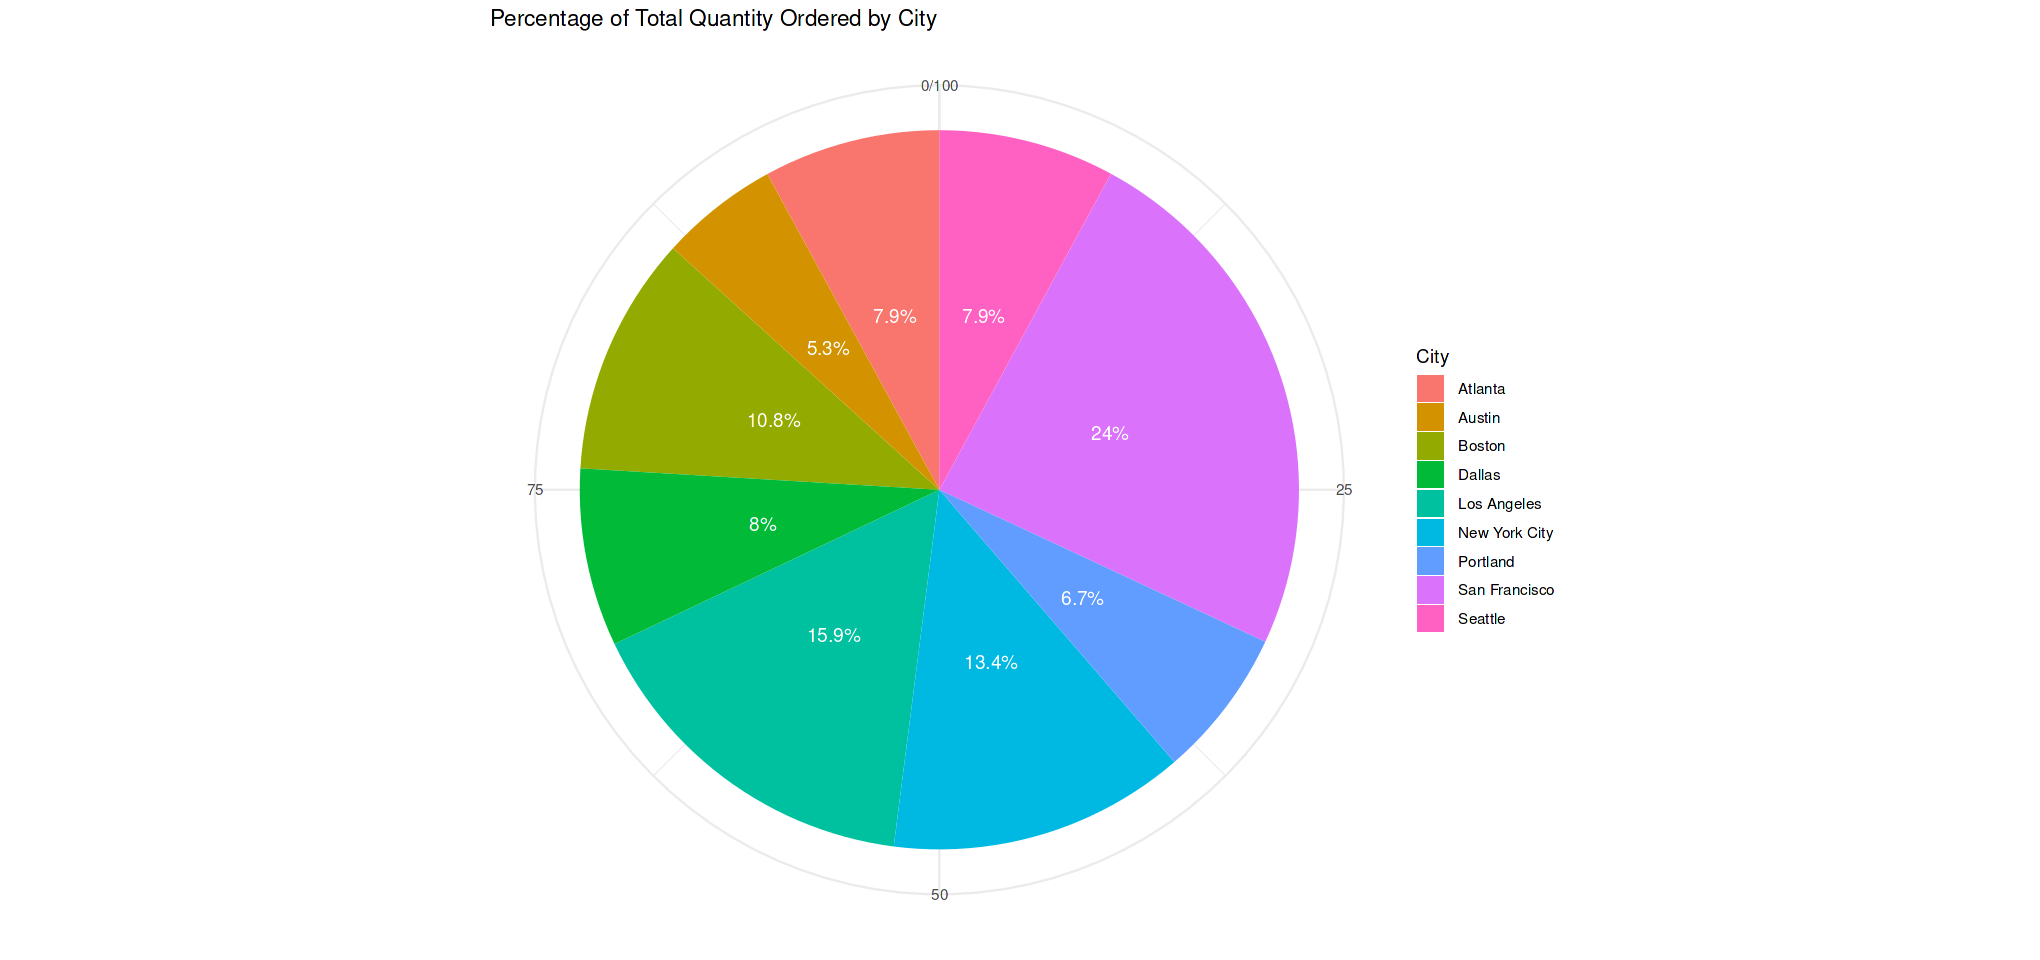

In [26]:
city <- data %>%
  group_by(City) %>%
  summarize(TotalOrdered = sum(QuantityOrdered)) %>%
  arrange(desc(TotalOrdered))

city$Percentage <- city$TotalOrdered / sum(city$TotalOrdered) * 100

pie_chart <- ggplot(city, aes(x = "", y = Percentage, fill = City)) +
  geom_bar(width = 1, stat = "identity") +
  geom_text(aes(label = paste0(round(Percentage, 1), "%")), 
            position = position_stack(vjust = 0.5), 
            color = "white") +
  coord_polar("y", start = 0) +
  labs(title = "Percentage of Total Quantity Ordered by City",
       fill = "City",
       x = NULL,
       y = NULL) +
  scale_fill_discrete(name = "City") +
  theme_minimal() +
  guides(fill = guide_legend(title = "City"))

pie_chart

### San Francisco has highest quantity ordered

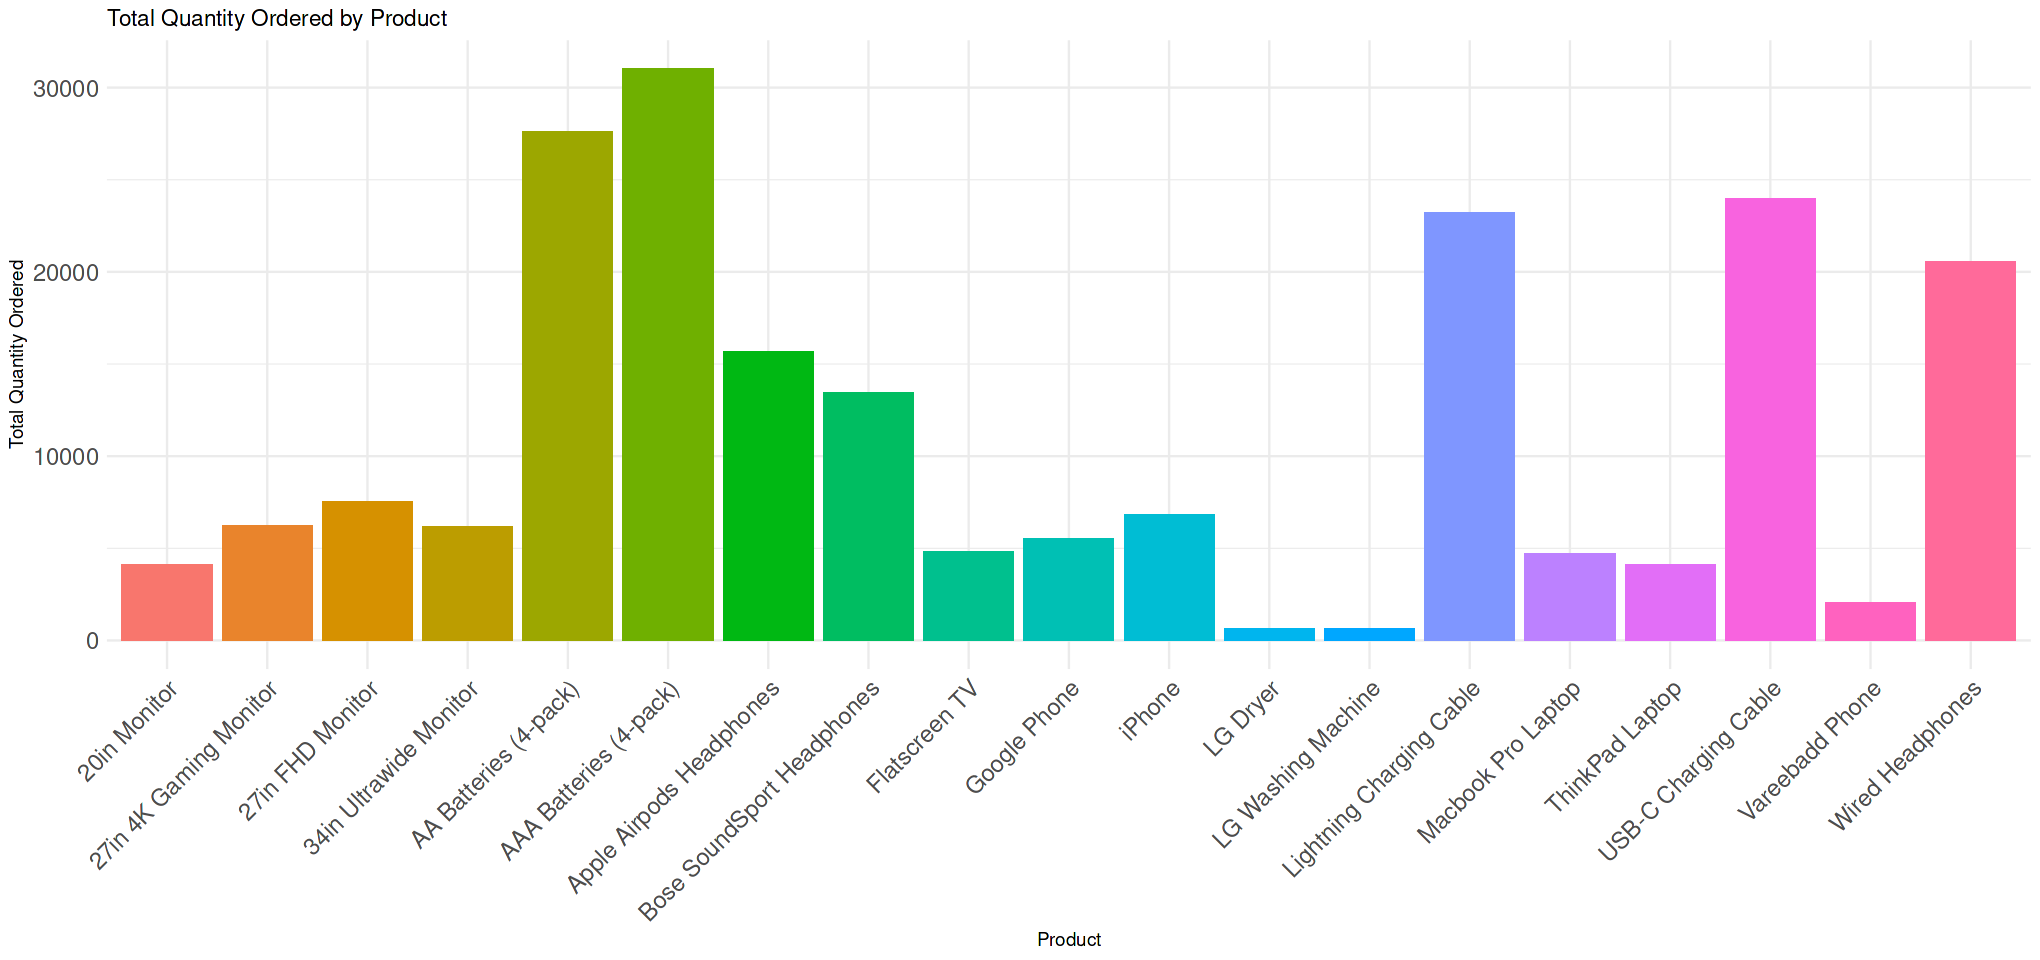

In [27]:
product <- data %>%
group_by(Product)%>%
summarize(TotalOrdered = sum(QuantityOrdered))%>%
arrange(desc(TotalOrdered))

bargraph <- ggplot(data = product) +
  geom_bar(mapping = aes(x = Product, y = TotalOrdered, fill = Product),
           stat = "identity",
           width = 0.90) +
  labs(title = "Total Quantity Ordered by Product",
       x = "Product",
       y = "Total Quantity Ordered") +
  theme_minimal() +
  theme(axis.text.x = element_text(size = 14, angle = 45, hjust = 1),
        axis.text.y = element_text(size = 14),
        legend.position = "none")

bargraph

### The best-selling product is AAA Batteries (4-pack)

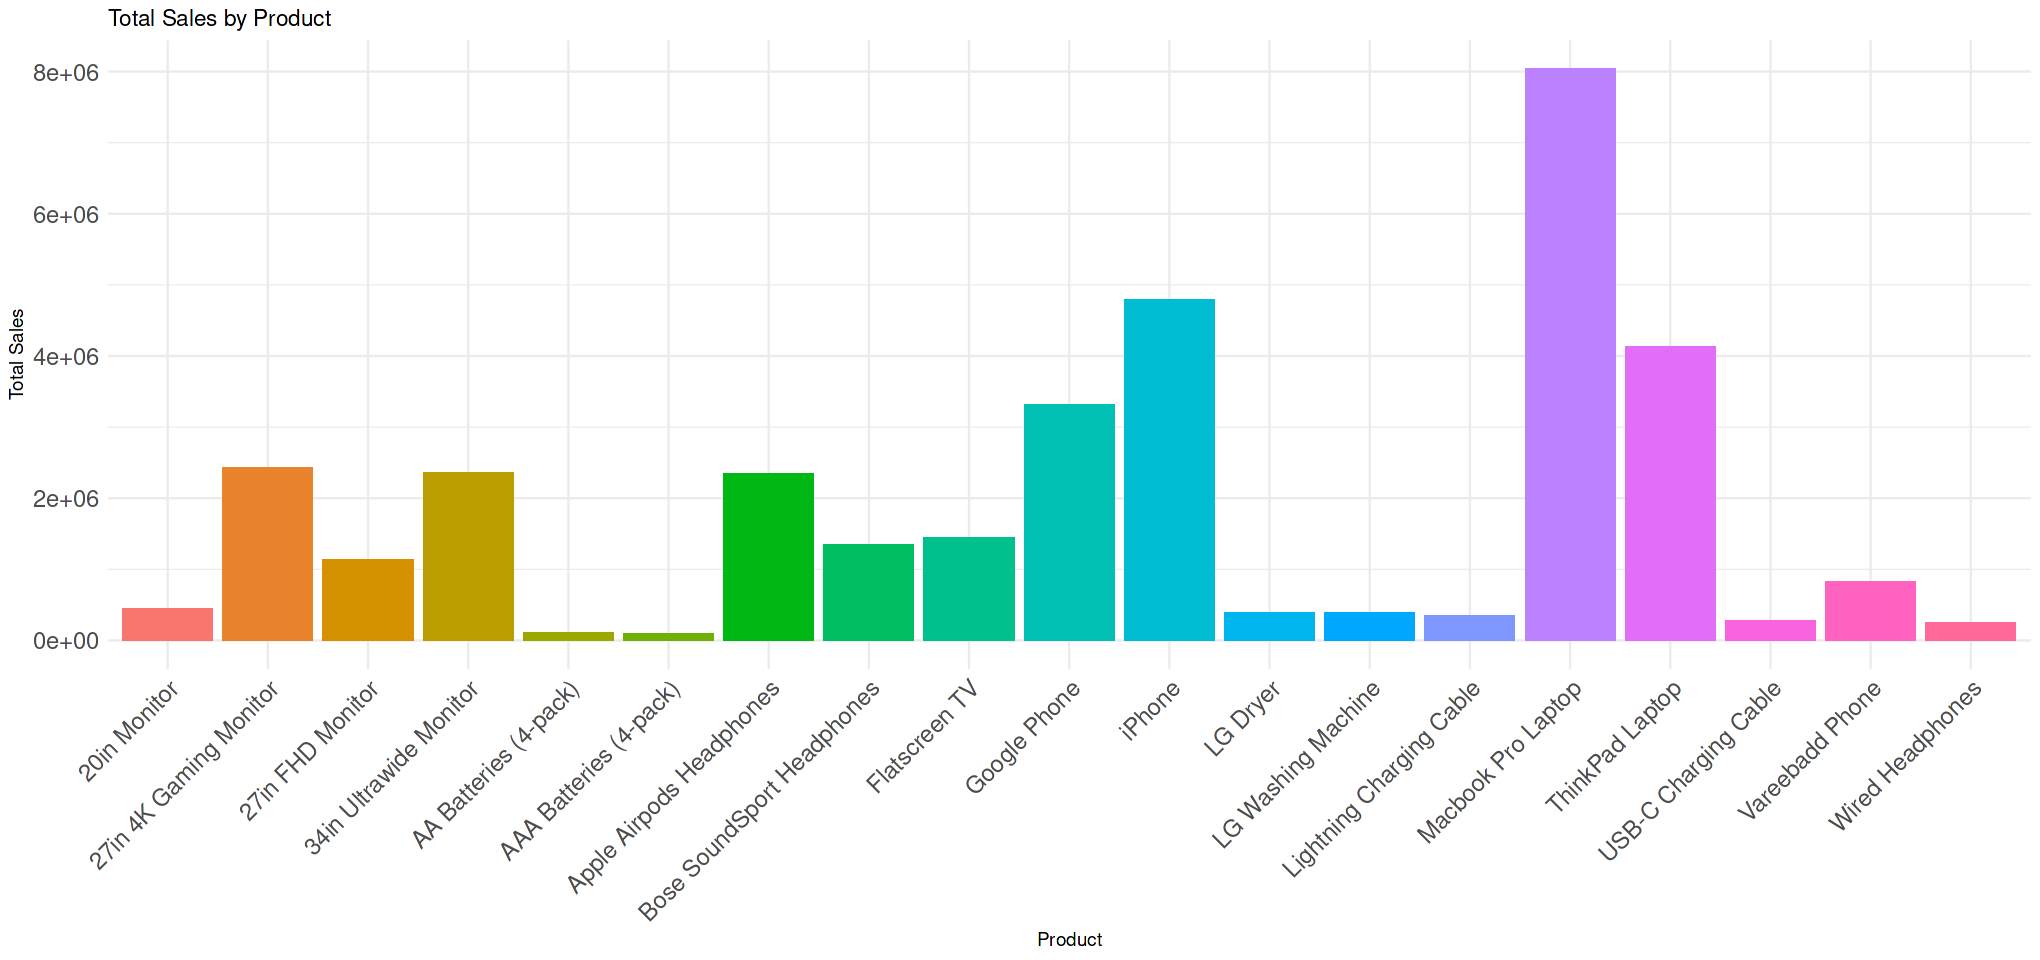

In [28]:
product_sales <- data %>%
  group_by(Product) %>%
  summarize(TotalSales = sum(Sales))

bargraph <- ggplot(data = product_sales) +
  geom_bar(mapping = aes(x = Product, y = TotalSales, fill = Product),
           stat = "identity",
           width = 0.90) +
  labs(title = "Total Sales by Product",
       x = "Product",
       y = "Total Sales") +
  theme_minimal() +
  theme(axis.text.x = element_text(size = 14, angle = 45, hjust = 1),
        axis.text.y = element_text(size = 14),
        legend.position = "none")

print(bargraph)

### Most Amount in Sales is by Macbook Pro Laptop

In [29]:
order <- data %>% 
group_by(OrderID) %>%
mutate(ProductSold = paste(Product, collapse = " , ")) %>% 
select(OrderID, ProductSold)

order <- order[!duplicated(order), ]
head(order %>% filter(grepl(",", ProductSold)))

OrderID,ProductSold
<chr>,<chr>
141275,"USB-C Charging Cable , Wired Headphones"
141290,"Apple Airpods Headphones , AA Batteries (4-pack)"
141365,"Vareebadd Phone , Wired Headphones"
141384,"Google Phone , USB-C Charging Cable"
141450,"Google Phone , Bose SoundSport Headphones"
141457,"iPhone , Apple Airpods Headphones"


In [30]:
counter <- c()

for (ProductList in order$ProductSold) {
  if (grepl(",", ProductList)) {
    combination <- combn(strsplit(ProductList, ",")[[1]], 2)
    for (i in 1:dim(combination)[2]) {
      TwoProducts <- paste(sort(combination[, i]), collapse = ",")
      if (TwoProducts %in% names(counter)) {
        counter[TwoProducts] <- counter[TwoProducts] + 1   
      } else {
        counter[TwoProducts] <- 1
      }
    }    
  }
}

ProductGroup <- data.frame(ProductCombo = names(counter), Frequency = as.vector(counter)) %>%
  arrange(desc(Frequency))

head(ProductGroup)

,ProductCombo,Frequency
,<chr>,<dbl>
1,"Lightning Charging Cable,iPhone",886
2,"USB-C Charging Cable,Google Phone",859
3,"Wired Headphones,iPhone",443
4,"Wired Headphones,Google Phone",405
5,"Apple Airpods Headphones,iPhone",329
6,"USB-C Charging Cable,Vareebadd Phone",312


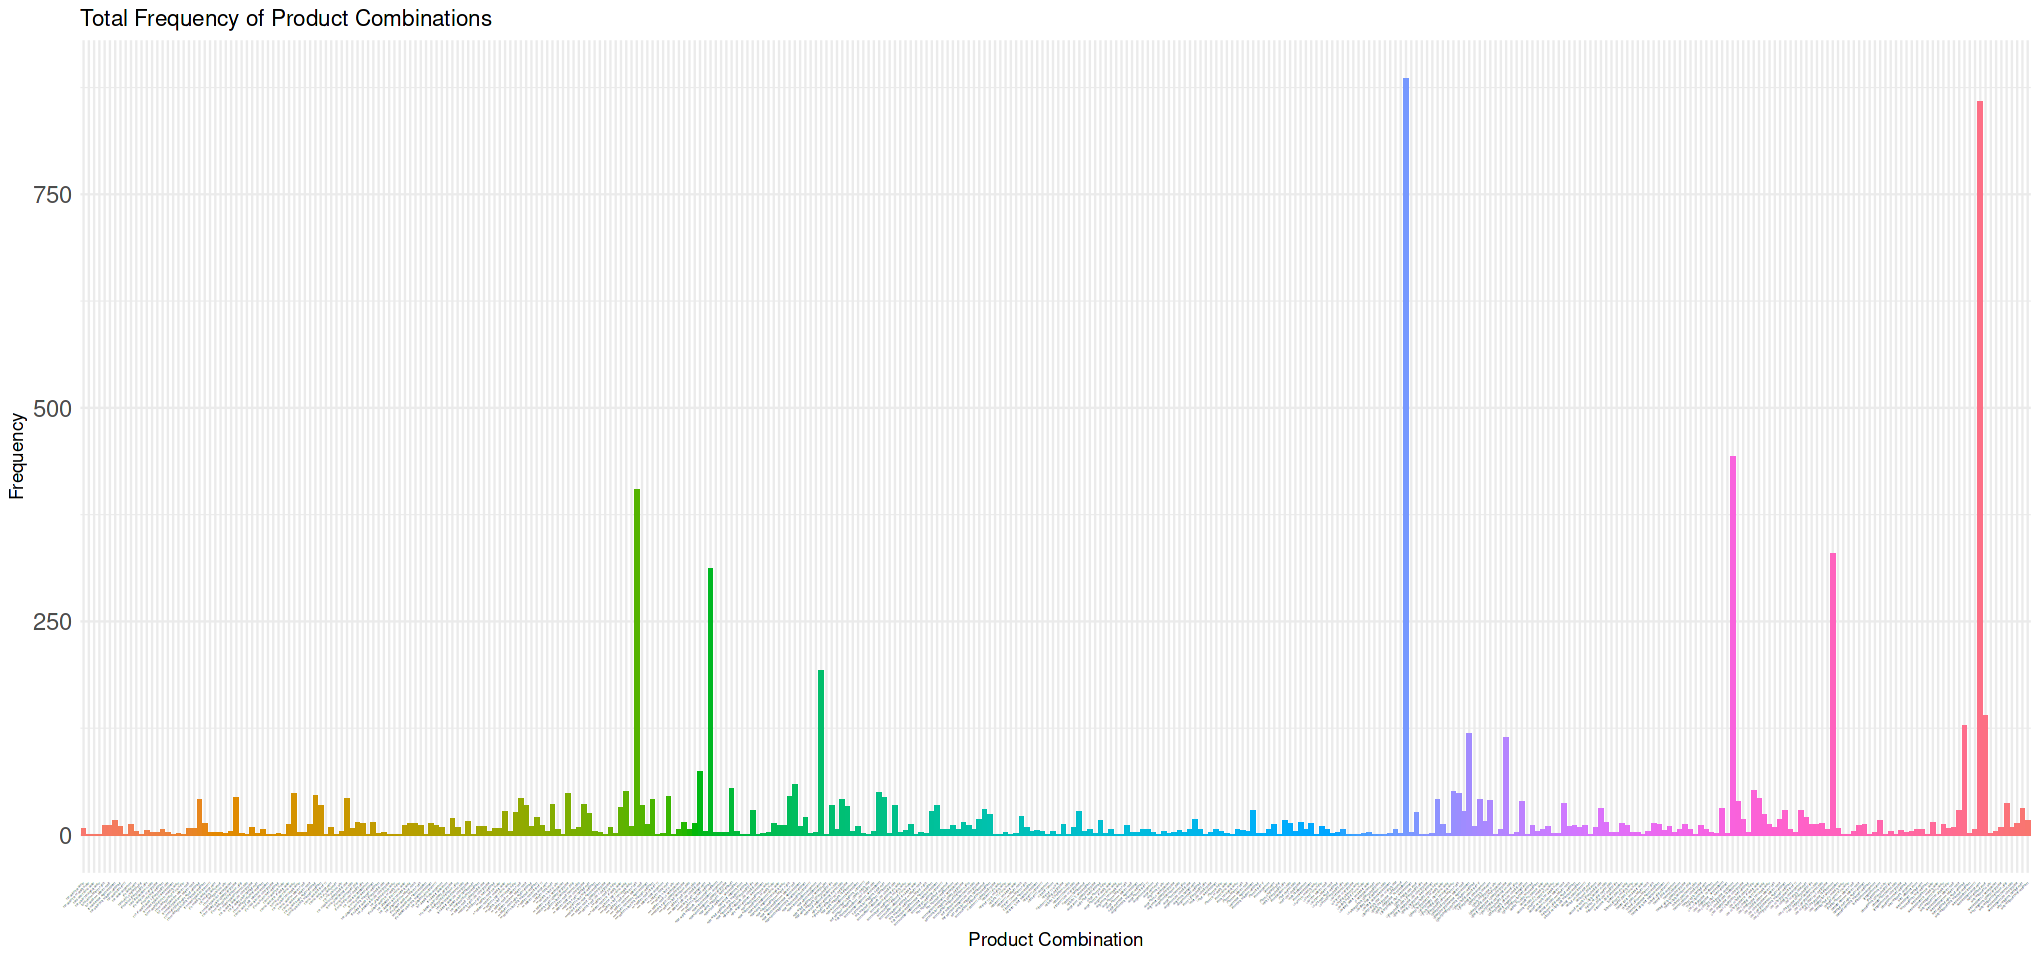

In [31]:
bargraph <- ggplot(data = ProductGroup) +
  geom_bar(mapping = aes(x = ProductCombo, y = counter, fill = ProductCombo),
           stat = "identity",
           width = 0.90) +
  labs(title = "Total Frequency of Product Combinations",
       x = "Product Combination",
       y = "Frequency") +
  theme_minimal() +
  theme(axis.text.x = element_text(size = 1, angle = 45, hjust = 1),
        axis.text.y = element_text(size = 14),
        legend.position = "none")

print(bargraph)


In [32]:
top10 <- ProductGroup %>%
head(10) %>%
mutate(Percentage = (Frequency / sum(Frequency)) * 100)

top10

,ProductCombo,Frequency,Percentage
,<chr>,<dbl>,<dbl>
1,"Lightning Charging Cable,iPhone",886,23.236297
2,"USB-C Charging Cable,Google Phone",859,22.528193
3,"Wired Headphones,iPhone",443,11.618148
4,"Wired Headphones,Google Phone",405,10.621558
5,"Apple Airpods Headphones,iPhone",329,8.628377
6,"USB-C Charging Cable,Vareebadd Phone",312,8.182533
7,"Bose SoundSport Headphones,Google Phone",192,5.035405
8,"Wired Headphones,Vareebadd Phone",140,3.671650
9,"USB-C Charging Cable ,Google Phone",128,3.356937


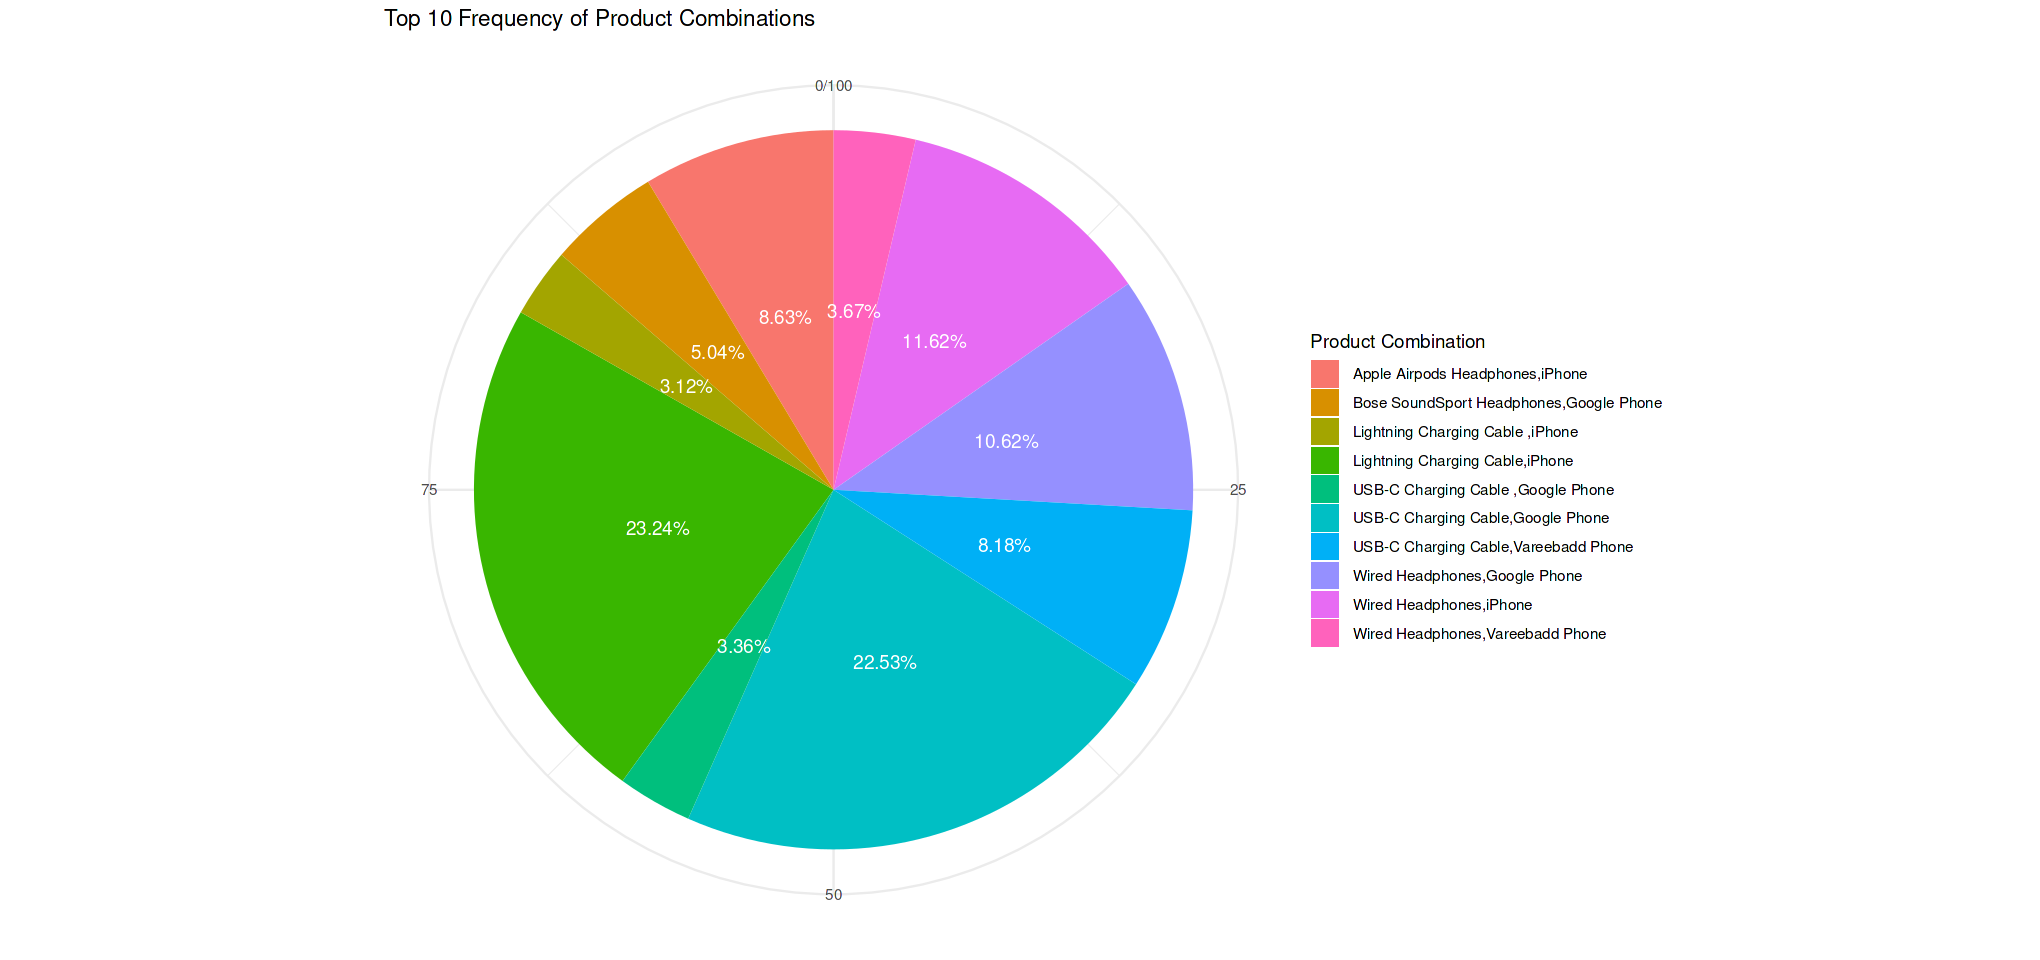

In [33]:
piechart <- ggplot(top10, aes(x = "", y = Percentage, fill = ProductCombo)) +
  geom_bar(width = 1, stat = "identity") +
  coord_polar("y", start = 0) +
  labs(title = "Top 10 Frequency of Product Combinations",
       fill = "Product Combination",
       x = NULL,
       y = NULL) +
  scale_fill_discrete(name = "Product Combination") +
  geom_text(aes(label = paste0(round(Percentage, 2), "%")), position = position_stack(vjust = 0.5), color = "white") +
  theme_minimal()

piechart